# Практическое задание на тему "Погрешности вычислений"
Задача 1.9: Применение Алгоритма Архимеда для нахождения числа $\pi$

In [2]:
# Подключение библиотек

import numpy as np
import matplotlib.pyplot as plt
from bigfloat import *

In [3]:
# Алгоритм Архимеда

def calcPi(n, prec):
    with precision(prec):
        if n == 1:
            return (2 * sqrt(2)) # условие выхода из рекурсии
        else:
            return (pow(2, n) * sqrt(2 * (1 - sqrt(1 - pow(calcPi(n-1, prec)/(pow(2, n)), 2))))) # рекурсивная формула

In [4]:
# Улучшенный Алгоритм Архимеда

def calcR(n, prec):
    with precision(prec):
        if n == 1:
            return 2 # условие выхода из рекурсии
        else:
            r = calcR(n-1, prec)
            return (r/(2 + sqrt(4 - r))) # рекурсивная формула для r

def calcPiPlus(n, prec):
    with precision(prec):
        return (pow(2, n) * sqrt(calcR(n, prec))) # рекурсивная формула для p

In [11]:
# Анализ результатов

# параметры вычислений
prec = 113 # длина мантиссы
n = 1000 # количество итераций

Pi1 = calcPi(n, prec)
Pi2 = calcPiPlus(n, prec)

with precision(prec):
    print('Теоретическое значение Пи:  ', const_pi(), '\n')

print('Алгоритм Архимеда:          ', calcPi(n, prec))
with precision(prec):
    print('Погрешность вычислений:     ', abs(const_pi() - Pi1), '\n')

print('Алгоритм Архимеда+:         ', calcPiPlus(n, prec))
with precision(prec):
    print('Погрешность вычислений:     ', abs(const_pi() - Pi2), '\n')


# Вычисление машинного эпсилон

expEps = 1
with precision(prec): # алгоритм вычисления
    while 1 + expEps != 1:
        expEps = div(expEps, 2)
    thEps = pow(2, -prec)

# сравнение результата с теоретическим
print('Вычисленное значение eps:   ', expEps)
print('Теоретическое значение eps: ', thEps)

Теоретическое значение Пи:   3.14159265358979323846264338327950280 

Алгоритм Архимеда:           0
Погрешность вычислений:      3.14159265358979323846264338327950280 

Алгоритм Архимеда+:          3.14159265358979323846264338327950318
Погрешность вычислений:      3.85185988877447170611195588516985464e-34 

Вычисленное значение eps:    9.62964972193617926527988971292463659e-35
Теоретическое значение eps:  9.62964972193617926527988971292463659e-35


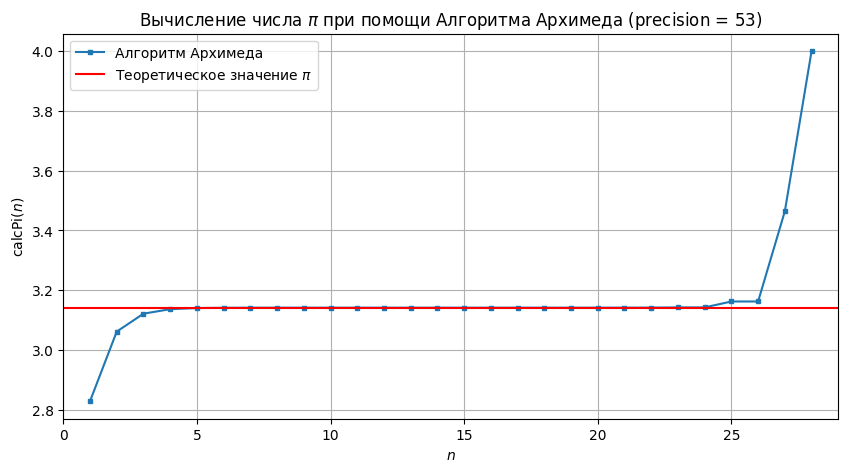

In [6]:
# Построение графика calcPi(n)

tmp = 1
n = 1

pi_n = []
x_n = []

prec = 53 # длина матиссы

while True: # сбор данных
    
    tmp = calcPi(n, prec)
    if tmp == 0 or tmp > 10:
        break
    pi_n.append(tmp)
    x_n.append(n)
    n += 1

# построение графика
plt.figure(figsize=[10, 5])
plt.plot(x_n, pi_n, marker='s', markersize='3', label='Алгоритм Архимеда')
with precision(1000):
    plt.plot([0, x_n[-1]+1], [const_pi(), const_pi()], 'r', label='Теоретическое значение $\pi$')
plt.title('Вычисление числа $\pi$ при помощи Алгоритма Архимеда (precision = ' + str(prec) + ')')
plt.xlabel('$n$')
plt.ylabel('$\\text{calcPi}(n)$')
plt.xlim([0, x_n[-1]+1])
plt.legend()
plt.grid()

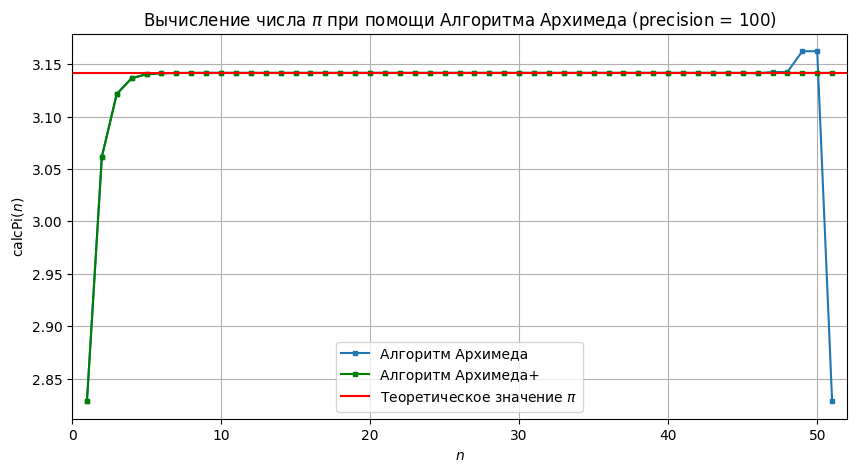

In [7]:
# Построение графиков calcPi(n) и calcPiPlus(n)

tmp = 1
n = 1

pi1_n = []
pi2_n = []
x_n = []

prec = 100 # длина мантиссы

while True: # сбор данных

    tmp = calcPi(n, prec)
    if tmp == 0 or tmp > 10:
        break
    pi1_n.append(tmp)

    tmp = calcPiPlus(n, prec)
    pi2_n.append(tmp)

    x_n.append(n)
    n += 1

# построение графика
plt.figure(figsize=[10, 5])
plt.plot(x_n, pi1_n, marker='s', markersize='3', label='Алгоритм Архимеда')
plt.plot(x_n, pi2_n, marker='s', markersize='3', color='g', label='Алгоритм Архимеда+')
with precision(1000):
    plt.plot([0, x_n[-1]+1], [const_pi(), const_pi()], 'r', label='Теоретическое значение $\pi$')
plt.title('Вычисление числа $\pi$ при помощи Алгоритма Архимеда (precision = ' + str(prec) + ')')
plt.xlabel('$n$')
plt.ylabel('$\\text{calcPi}(n)$')
plt.xlim([0, x_n[-1]+1])
plt.legend()
plt.grid()

# Выводы

Мы видим, что классический Алгоритм Архимеда не годится для вычисления значения константы $\pi$. Это связано с тем, что рекурсивное выражение, по которому производится рассчёт в алгоритме, способствует накоплению ошибки округления, что делает алгоритм неустойчивым. Это приводит к тому, что при определённом количестве итераций (примерно половина длины мантиссы в битах) значения вычислений начинают сильно отклоняться от теоретического. В ходе работы это было показано.

Однако улучшенный алгоритм таким свойством не обладает. При каждой новой итерации значения, полученные по улучшенному алгоритму, вычисляются всё более точно (уточняются). Алгоритм устойчивый и по нему рассчёт проводить разумно. Ошибка округления здесь при достаточно большом количестве итераций будет порядка машинного числа, что также было показано в работе. То есть точность вычислений по улучшенному алгоритму зависит только от величины пространства памяти числа, которое участвует в арифметических операциях. В данной работе варировалась мантисса числа с плавающей точкой.